In [1]:
# General Data Science Libraries
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import warnings
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
import sklearn as sk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost


# Natural Language Processing Libraries
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import PorterStemmer  
from sklearn.feature_extraction.text import TfidfVectorizer
import re

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings('ignore')

/kaggle/input/crickalike/shot_categorization.csv
/kaggle/input/crickalike/event_classifier.csv


In [2]:
df = pd.read_csv('../input/crickalike/shot_categorization.csv', index_col = [0])
df.head()
df.shape

(1372, 2)

In [3]:
def text_cleaning(df, column):
    df_column_array = np.array(df[column])
    text = []
    ps = PorterStemmer()
    for index in range(len(df_column_array)):
        modifiedText = remove_stopwords(df.at[index, column])
        stemmedSentence = ""
        for word in modifiedText.split():
            word = re.sub(r"[^a-zA-Z]+", '', word)
            word = word.strip()
            word = word.lower()
            word = ps.stem(word)
            word = word.strip()
            stemmedSentence += word
            stemmedSentence += " "
        df.at[index, column] = stemmedSentence

In [4]:
text_cleaning(df, 'commentary')
df.head()

,commentary,target
0,shamsi samson run south africa win run shams...,0
1,shamsi samson four drill toss off samson come ...,1
2,shamsi samson run no cant legal deliveri sham...,0
3,shamsi samson four hattrick boundari samson fl...,1
4,shamsi samson four backtoback boundari samson ...,1


In [5]:
def vectorize(data, tfidf_vect_fit):
    x_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names()
    x_tfidf_df = pd.DataFrame(x_tfidf.toarray())
    x_tfidf_df.columns = words
    return (x_tfidf_df)

In [6]:
tfidf_vect = TfidfVectorizer(analyzer = 'word', stop_words = None, ngram_range=(1, 2), max_df = 0.5, use_idf = True, smooth_idf = True, max_features = 900)
tfidf_vect_fit = tfidf_vect.fit(df['commentary'])

df.reset_index(drop = True, inplace = True)
df_temp = vectorize(df['commentary'], tfidf_vect_fit)
df_temp.reset_index(drop = True, inplace = True)

df = pd.concat([df, df_temp], axis = 1)

df.drop(columns = ['commentary'], inplace = True)

df.head()

,target,across,advanc,africa,again,ahm,ahm hendrick,ahm janneman,ahm klaasen,ahm marco,...,wrong,wrong un,yadav,yadav hendrick,yadav klaasen,yadav kock,yadav marco,yadav markram,yadav miller,yorker
0,0,0.0,0.0,0.24141,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
smote_over_sample = SMOTE(sampling_strategy = 'minority')
x, y = smote_over_sample.fit_resample(df.drop(columns = 'target'), df['target'])

x_train, x_test, y_train, y_test = train_test_split(x, y,stratify = y, random_state = 1)

In [8]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(x_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
Accuracy: 84.5378%
Log Loss: 2.5273030879762164
DecisionTreeClassifier
Accuracy: 99.4958%
Log Loss: 0.1741450910667775
RandomForestClassifier
Accuracy: 98.9916%
Log Loss: 0.08065010129187176
XGBClassifier
Accuracy: 99.1597%
Log Loss: 0.030503498341623074
AdaBoostClassifier
Accuracy: 99.1597%
Log Loss: 0.44429766450563013
GradientBoostingClassifier
Accuracy: 98.8235%
Log Loss: 0.03876306057506493
GaussianNB
Accuracy: 98.6555%
Log Loss: 0.4643869095114051
LinearDiscriminantAnalysis
Accuracy: 97.9832%
Log Loss: 0.696580364267112


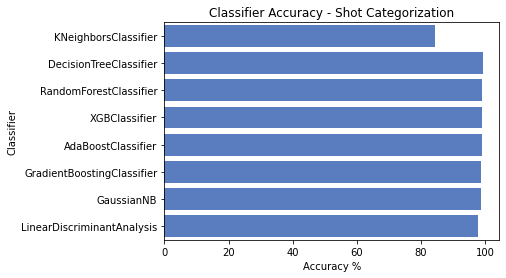

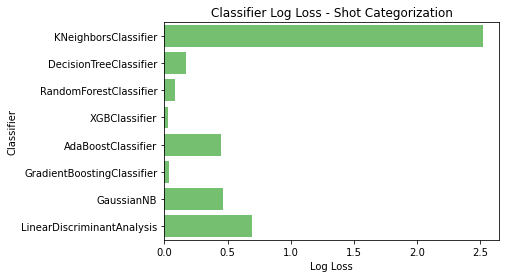

In [9]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy - Shot Categorization')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss - Shot Categorization')
plt.show()

In [10]:
print(len(x))
print(len(x_train))
print(len(x_test))

2380
1785
595


In [11]:
model = XGBClassifier(random_state = 42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.9915966386554622


In [12]:
print(len(y_train))

1785


In [13]:
print(len(y_test))
print(sum(y_test))

595
298


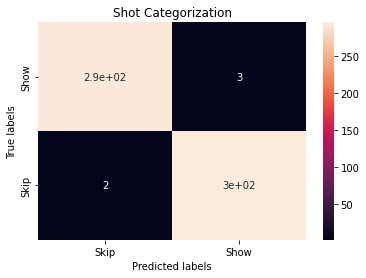

<Figure size 432x288 with 0 Axes>

In [14]:
Cm=confusion_matrix(y_test, y_pred)
ax=plt.axes()
sns.heatmap(Cm, annot = True, annot_kws = {'size':10}, ax = ax)
plt.title("Confusion Metrics")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Shot Categorization'); 
ax.xaxis.set_ticklabels(['Skip', 'Show']); ax.yaxis.set_ticklabels(['Show', 'Skip']);
plt.show()
plt.savefig('sc_cm.png')

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Shot Categorization', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

In [16]:
# sampleClassificationReport = """             precision    recall  f1-score   support

#           Skip       1.00      0.99      0.99       297
#           Show       0.99      1.00      0.99       298
#           macro avg       0.99      0.99      0.99       595
#           weighted avg       0.99      0.99      0.99       595"""


# plot_classification_report(sampleClassificationReport)
# plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
# plt.close()

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       297
           1       0.99      0.99      0.99       298

    accuracy                           0.99       595
   macro avg       0.99      0.99      0.99       595
weighted avg       0.99      0.99      0.99       595



In [18]:
# from sklearn.metrics import roc_auc_score
# import sklearn
# import matplotlib.pyplot as plt

# y_true = y_test
# y_score = np.expand_dims(y_pred, -1)

# # y_true is a list of true labels
# # y_score is a list of predicted probabilities for each class
# n_classes = len(np.unique(y_true))
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = sklearn.metrics.roc_curve(y_true, y_score[:, i], pos_label=i)
#     roc_auc[i] = roc_auc_score(y_true, y_score[:, i])

# plt.figure()
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))
# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()

In [19]:
def computeAccuracy(df, number_of_features):
    pca = PCA(n_components = number_of_features)
    
    features = np.array(df.drop(columns = 'target'))
    features_reduced = pca.fit_transform(features)
    
    labels = df['target'].tolist()
    
    x_train, x_test, y_train, y_test = train_test_split(features_reduced, labels, stratify = labels, random_state = 1)
    
    model = XGBClassifier(random_state = 42)

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    return accuracy_score(y_test, y_pred);

In [20]:
score = [computeAccuracy(df, i) for i in range(1, 8)]
score

[0.8279883381924198,
 0.8542274052478134,
 0.8425655976676385,
 0.8367346938775511,
 0.8542274052478134,
 0.8483965014577259,
 0.8629737609329446]

In [21]:
space = {
        'objective': 'multi:softprob',
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.loguniform('reg_alpha', 1e-8,100),
        'reg_lambda' : hp.loguniform('reg_lambda', 1e-8,100),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.1,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 1800,
        'seed': 0,
        'learning_rate': hp.quniform("learning_rate", 1e-2, 0.25),
        'max_depth': hp.uniform('max_depth', 1, 7)
}

def objective(space, df_train, df_test):
    clf = XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']), min_child_weight = int(space['min_child_weight']),
                    colsample_bytree = int(space['colsample_bytree']))
        
    xx_train = df_train.drop(columns = ['target'])
    yy_train = df_train['target']
    
    xx_test = df_test.drop(columns = ['target'])
    yy_test = df_test['target']
    
    evaluation = [(xx_train, yy_train), 
                  (xx_test, yy_test)]
    
    clf.fit(xx_train, yy_train, eval_set=evaluation, eval_metric=None, early_stopping_rounds=20,verbose=False)
    
    pred = clf.predict(xx_test)
    accuracy = accuracy_score(yy_test, pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()

# best_hyperparams = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 100, trials = trials)

In [22]:
sorted_columns = list(df.columns)
sorted_columns.remove('target')
sorted_columns = sorted(sorted_columns)

final_ordered_features = []

for col in sorted_columns:
    final_ordered_features.append(col)

print(len(final_ordered_features))

900


In [23]:
with open('tf_idf_shot', 'wb') as files:
    pickle.dump(tfidf_vect, files)

In [24]:
with open('shot_categorization', 'wb') as files:
    pickle.dump(model, files)

In [25]:
with open('final_ordered_shot', 'wb') as files:
    pickle.dump(final_ordered_features, files)